In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

### Scenario 4: Online Shopper Intention
    Industry: Business
    The dataset is collected from 12330 online sessions of multiple users around 1-year long avoiding any
    redundant or similar sessions. A number of features were recorded during each session like administrative,
    informational, productrelated and respective durations. "Special Day" feature indicates the closeness of the
    site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more
    likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of
    e-commerce such as the duration between the order date and delivery date. For example, for Valentine's day,
    this value takes a nonzero value between February 2 and February 12, zero before and after this date unless
    it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes
    operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value
    indicating whether the date of the visit is weekend, and month of the year.
    The task is find the generation of revenue or not.
    
    Tasks to be Performed:
    Import the required libraries
    Prepare the data (Data Proprocessing)
    Check for missing value
    Explore the data using EDA
    Training a logistic regression model
    Evaluating the model


In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
#df.info() # all are non-null

In [4]:
for column in df.select_dtypes(include=['object','bool']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


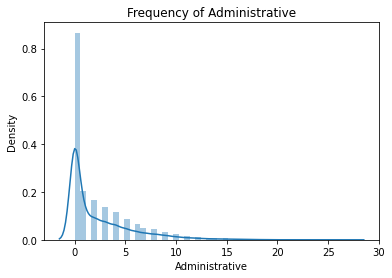

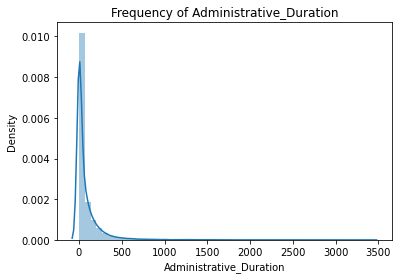

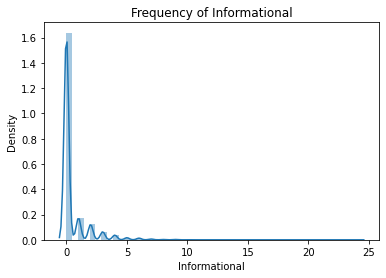

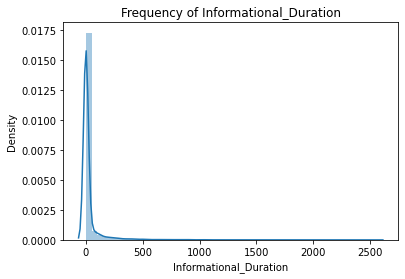

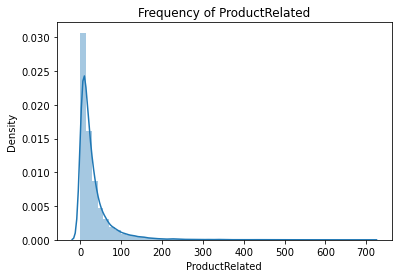

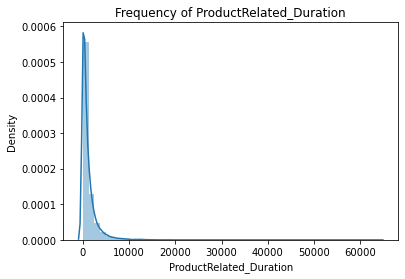

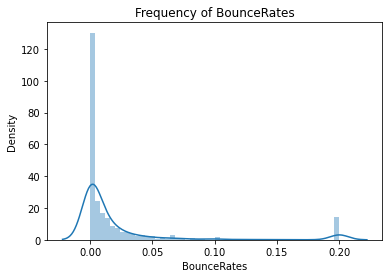

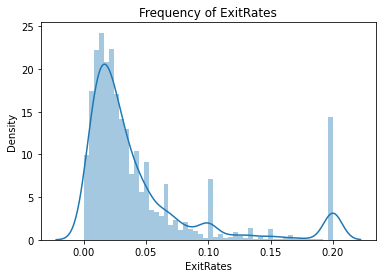

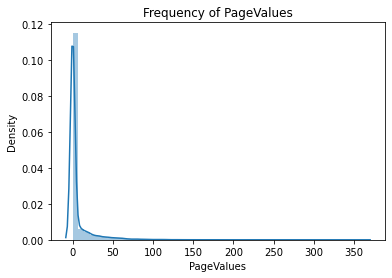

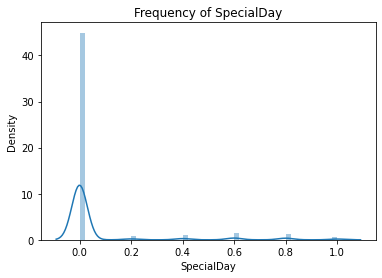

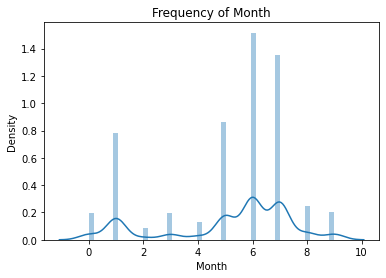

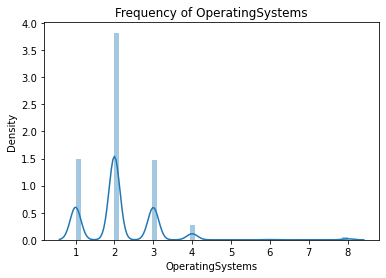

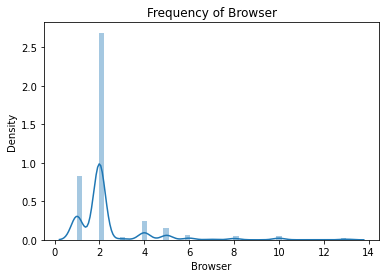

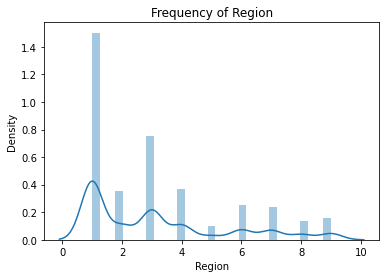

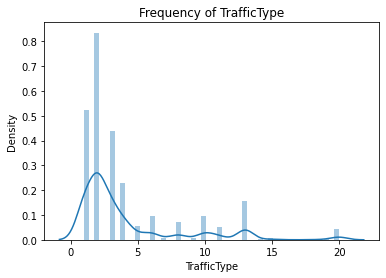

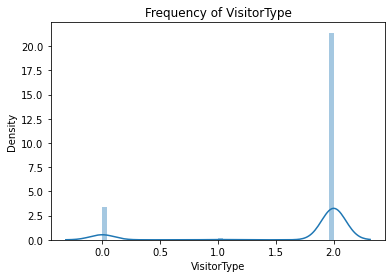

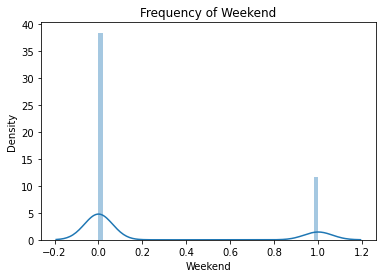

In [5]:
for column in df.columns[:-1]:
    sns.distplot(df[column])
    plt.title(f'Frequency of {column}')
    plt.show()

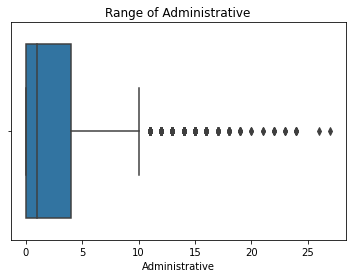

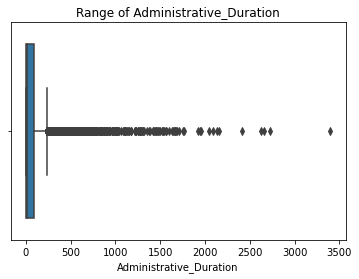

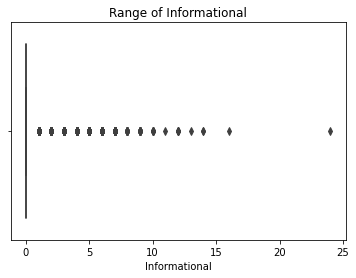

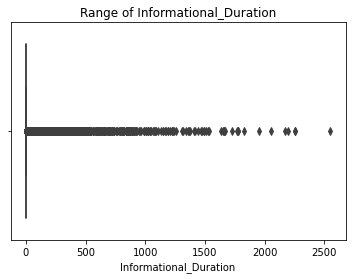

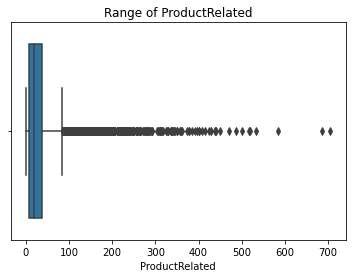

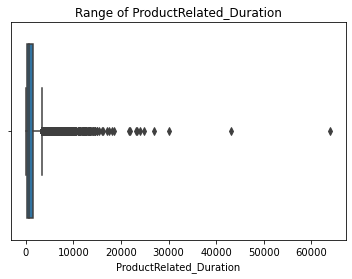

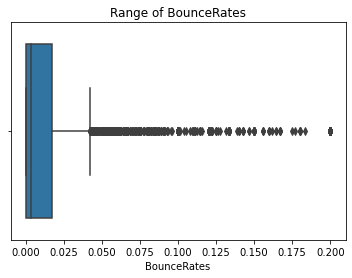

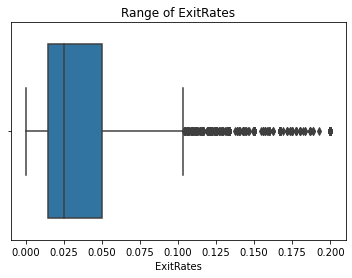

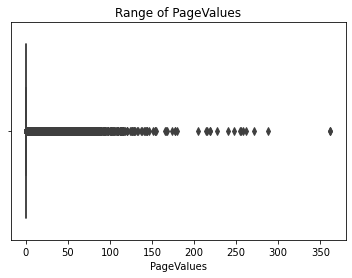

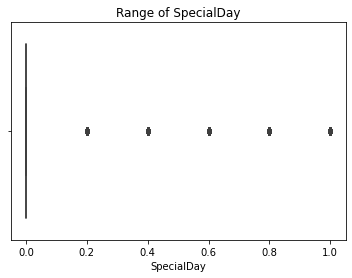

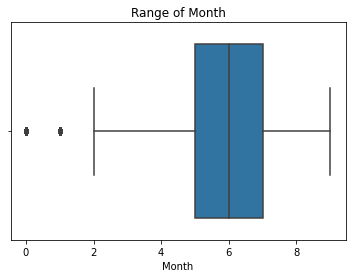

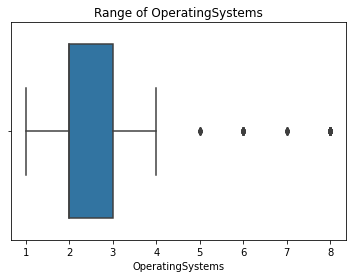

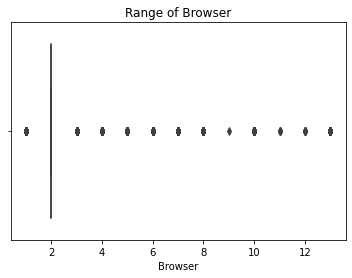

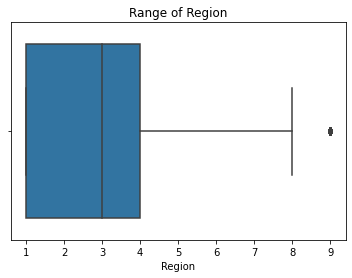

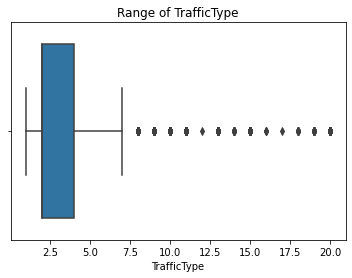

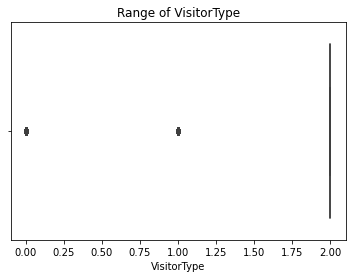

In [6]:
for column in df.columns[:-2]:
    sns.boxplot(df[column])
    plt.title(f'Range of {column}')
    plt.show()

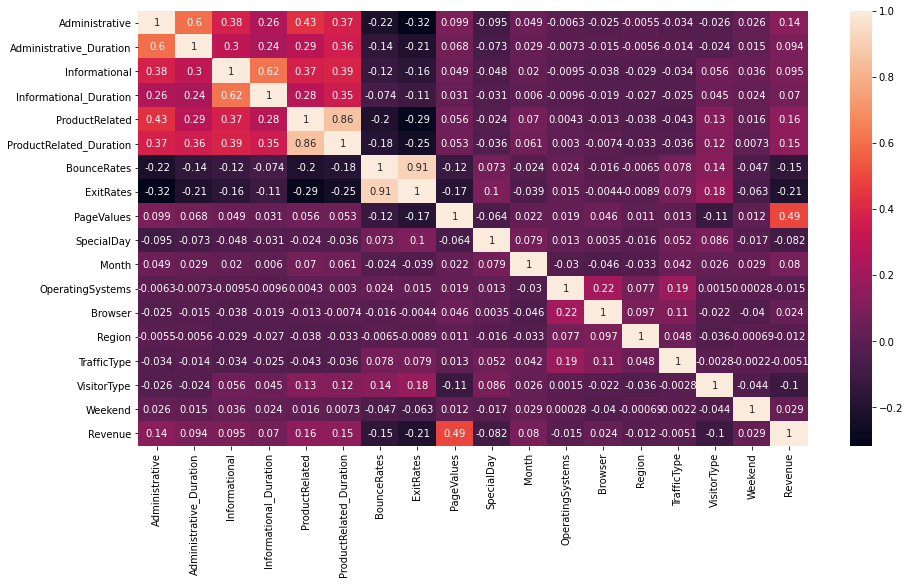

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [8]:
#outlier columns
outliers = ['Informational']
df[outliers].describe()

,Informational
count,12330.000000
mean,0.503569
std,1.270156
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,24.000000


In [9]:
df['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [10]:
#Creating a new dataframe since it is not balanced
df_copy = df.copy()
df_0 = df_copy[df_copy['Revenue'] == 0].sample((df_copy['Revenue'] == 1).sum())
print(df_0.shape)
df_temp = pd.concat([df_copy[df_copy['Revenue'] == 1], df_0], ignore_index=1)
df_temp.shape

(1908, 18)


(3816, 18)

In [11]:
df_temp['Revenue'].value_counts()

0    1908
1    1908
Name: Revenue, dtype: int64

In [12]:
X = df_temp.iloc[:, :-1]
y = df_temp.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [13]:
metrics.confusion_matrix(y_test, y_pred)

array([[504,  65],
       [160, 416]], dtype=int64)

In [14]:
print(f"Precision: {metrics.precision_score(y_test, y_pred)}")
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print(f"F1: {metrics.f1_score(y_test, y_pred)}")
print(f"Recall: {metrics.recall_score(y_test, y_pred)}")

Precision: 0.8648648648648649
Accuracy: 0.8034934497816594
F1: 0.7871333964049195
Recall: 0.7222222222222222


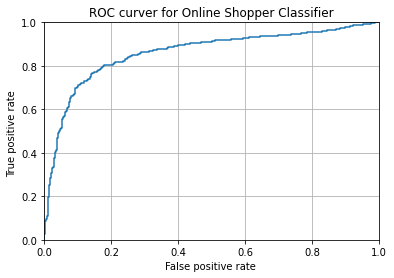

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, t= roc_curve(y_test, lr.predict_proba(X_test)[:,-1])
plt.plot(fpr, tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC curver for Online Shopper Classifier')
plt.xlabel('False positive rate ')
plt.ylabel('True positive rate ')
plt.grid(True)
plt.show()


In [37]:
print('The Area under the curve is: ',round(roc_auc_score(y_test,lr.predict_proba(X_test)[:,1])*100,2))

The Area under the curve is:  86.03
